# Analysis of Google Play Store Dataset (2010-2018)

Importing the libraries

In [1]:
import pandas as pd # Used to loading files
import numpy as np # Operate with mathematical operations
import matplotlib.pyplot as plt # Used for plotting
import seaborn as sns  # Used for visualizing

In [32]:
data = pd.read_csv("google.csv") # reading csv file

In [3]:
data.head() # reading first five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Analyzing the data

In [4]:
data.info() # missing values in rating, type, current and android ver
            # only rating attribute contains numerical data , rest of them belong to categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


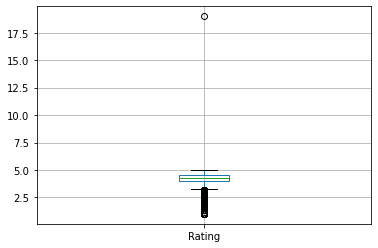

In [33]:
data.boxplot() # plotted data in the form of box
               # values lies between 2.5 - 5.0
               # circle represent that data is out the range (outlier)

# [Data Cleaning: (Pre-Processing)]

Step-01: (Removing Outlier)

To produce the quality result, there is a need to clean the data

In [34]:
data[data.Rating > 5]
data.drop([10472], inplace=True) # removing the outlier from original data using inplace

In [35]:
data[10470:10475] # checking the outlier index

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


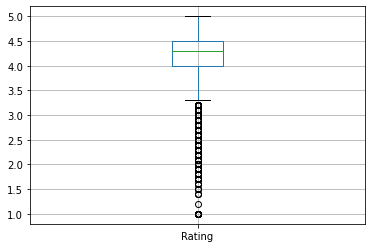

In [36]:
data.boxplot() # again plotting the data 

Step-02: (Handlying missing values)

In [37]:
# handling missing values
# counting the missing value from data
print(data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


Attribute: (Rating)

In [38]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [40]:
# Filling missing values using Aggregate Function (mean, median or mode)
# Applying Median on Rating attribute (Categorical)
def impute_median(series):
    return series.fillna(series.median)
data.Rating= data['Rating'].transform(impute_median)
print(data.isnull().sum())

In [41]:
data.Rating= data['Rating'].transform(impute_median)

In [11]:
data['Rating'].dtype

dtype('float64')

In [12]:
data.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Attribute: (Type) 

In [13]:
data['Type'].fillna(str(data['Type'].mode().values[0]),inplace=True)

In [14]:
data['Type'].unique()


array(['Free', 'Paid'], dtype=object)

Attribute: (Price)

In [15]:
data['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [16]:
# applying lambda function to convert each value [if it has a dollar sign, remove it...otherwise data will remain the same]
data['Price']=data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else (x))
# converting back the values into float value
data['Price']=data['Price'].apply(lambda x: str(x))
data['Price'] =data['Price'].astype(float)
data['Price'].dtype

dtype('float64')

In [17]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

Attribute: (Review)

In [30]:
data['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [19]:
data['Reviews'].unique()
data['Reviews'] =data['Reviews'].astype(float)
data['Reviews'].dtype

dtype('float64')

Attribute: (Install)

In [31]:
data['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [20]:
# applying lambda function to convert each value [if it has a plus and comma sign, remove it...otherwise data will remain the same]
data['Installs']=data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else (x))
data['Installs']=data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else (x))
data['Installs']=data['Installs'].apply(lambda x: str(x))
data['Installs'] =data['Installs'].astype(float)
data['Installs'].dtype

dtype('float64')

In [21]:
data['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [22]:
# converting back the values into float value
data['Installs']=data['Installs'].apply(lambda x: str(x))
data['Installs'] =data['Installs'].astype(float)
data['Installs'].dtype

dtype('float64')

Data type of Reviews, Installs, and Price is object. Converting there types into float to further analyze the data.

In [23]:
data.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.515219,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Exploring the Data

In [24]:
data.corr() #returns correlation

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068141,0.051355,-0.021903
Reviews,0.068141,1.000000,0.643122,-0.009667
Installs,0.051355,0.643122,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.011689,1.000000


In [25]:
grp = data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Reviews'].agg(np.mean)
z = grp['Price'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

Category and Rating

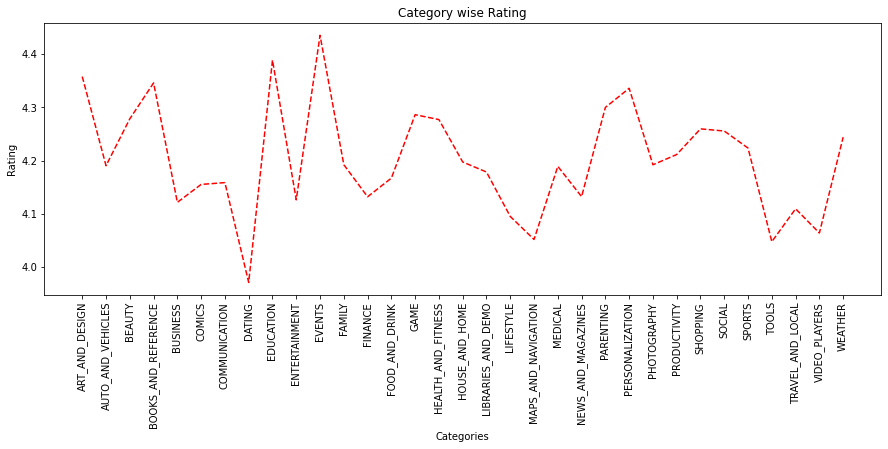

In [26]:
plt.figure(figsize=(15,5))
plt.plot(x, 'r--', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

Category and Reviews

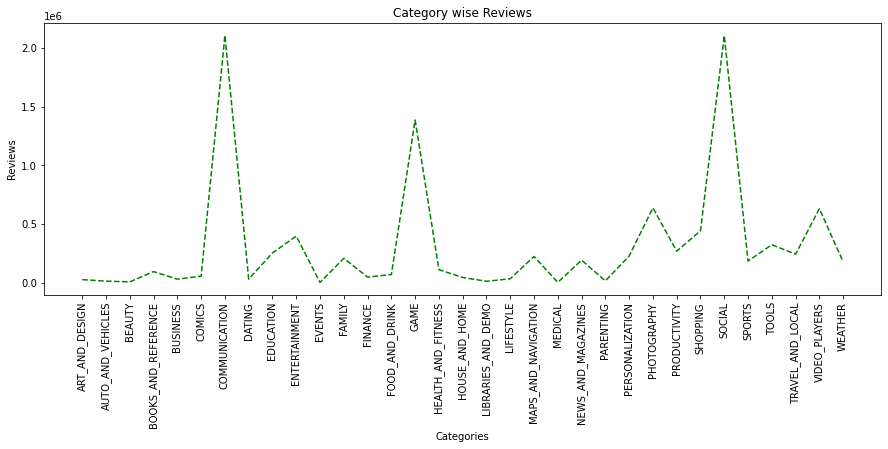

In [27]:
plt.figure(figsize=(15,5))
plt.plot(y, 'r--', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()

Category and Pricing

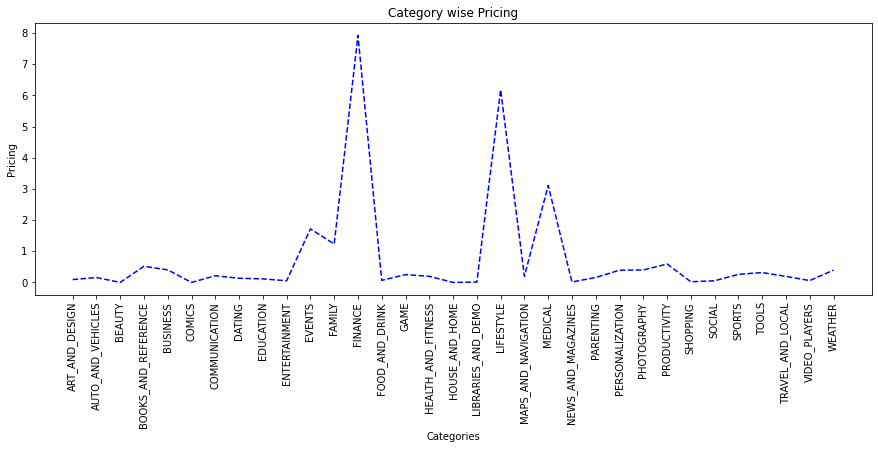

In [28]:
plt.figure(figsize=(15,5))
plt.plot(z, 'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories')
plt.ylabel('Pricing')
plt.show()